Machine learning models

In [ ]:
#Install libraries 
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
def plot_confusion_matrix(y, y_predict):
    "Plot the confusion matrix using a heatmap"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'landed']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [3]:
#Import SpaceX launch data
data = pd.read_csv("data/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
#Import one-hot encoded features data
X = pd.read_csv('data/dataset_part_3.csv')
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [5]:
#Create the target variable Y out of Class column converted to NumPy array 
Y = data['Class'].to_numpy()

In [6]:
#Initialize a StandardScaler to normalize feature values
transform = preprocessing.StandardScaler()

In [39]:
#Split the dataset into training (80%) and testing (20%) sets 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [40]:
#Normalize the training and testing datasets
X_train = transform.fit_transform(X_train)
X_test = transform.transform(X_test)

<b>Logistic regression</b>

In [41]:
#Define hyperparameters for logistic regression and initialize the LogisticRegression model
parameters_lr ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()

In [42]:
#Perform hyperparameter tuning for logistic regression using GridSearchCV with 10-fold cross-validation and fit the model
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters_lr, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [43]:
print("tuned hpyerparameters (best parameters):",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters (best parameters): {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8625


In [44]:
#Calculate the accuracy of the logistic regression model on the test dataset using the best parameters from GridSearchCV
accuracy_lr = logreg_cv.score(X_test, Y_test)

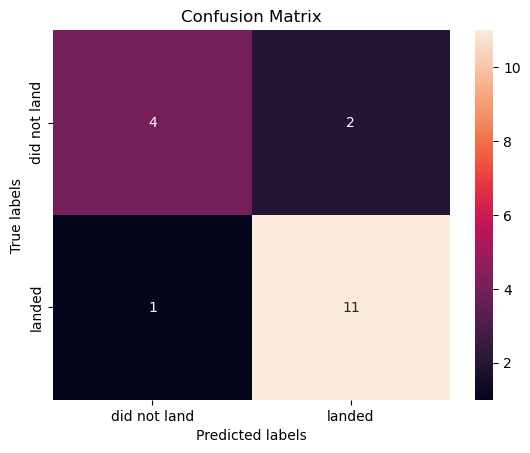

In [48]:
#Predict the test dataset using the logistic regression model and plot the confusion matrix
yhat_lr = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)

<b>Support Vector Machine (SVM)</b>

In [49]:
#Define hyperparameters for the SVM model and initialise the Support Vector Classifier (SVC) model
parameters_svm = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [50]:
#Perform hyperparameter tuning for SVM using GridSearchCV with 10-fold cross-validation and fit the model
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [51]:
print("tuned hpyerparameters (best parameters):",svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hpyerparameters (best parameters): {'C': 31.622776601683793, 'gamma': 0.001, 'kernel': 'rbf'}
accuracy : 0.8625


In [52]:
#Calculate the accuracy of the SVM model on the test dataset using the best parameters from GridSearchCV
accuracy_svm = svm_cv.score(X_test, Y_test)

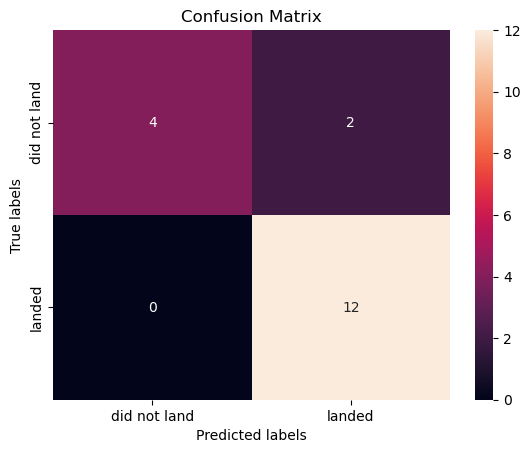

In [53]:
#Predict the test dataset using the SVM model and plot the confusion matrix
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)

<b>Decision Tree</b>

In [54]:
#Define hyperparameters for a Decision Tree Classifier and initialise the model
parameters_tree = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [55]:
#Perform hyperparameter tuning for decision tree using GridSearchCV with 10-fold cross-validation and fit the model
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)

/Users/kazumayabe/opt/anaconda3/envs/coursera/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kazumayabe/opt/anaconda3/envs/coursera/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kazumayabe/opt/anaconda3/envs/coursera/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/kazumayabe/opt/anaconda3/envs/coursera/lib/python3.12/site-packages/s

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [56]:
print("tuned hpyerparameters (best parameters):",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters (best parameters): {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8910714285714285


In [57]:
#Calculate the accuracy of the decision tree model on the test dataset using the best parameters from GridSearchCV
accuracy_tree = tree_cv.score(X_test, Y_test)

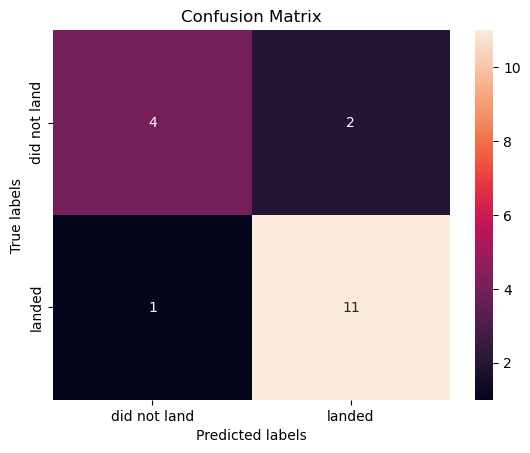

In [58]:
#Predict the test dataset using the decision tree model and plot the confusion matrix
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)

<b>K-nearest Neighbours (KNN)</b>

In [59]:
#Define hyperparameters for a KNN model and initialise the model
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [60]:
#Perform hyperparameter tuning for KNN using GridSearchCV with 10-fold cross-validation and fit the model
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [61]:
print("tuned hpyerparameters (best parameters):",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 0.8892857142857142


In [62]:
#Calculate the accuracy of the KNN model on the test dataset using the best parameters from GridSearchCV
accuracy_knn = knn_cv.score(X_test, Y_test)

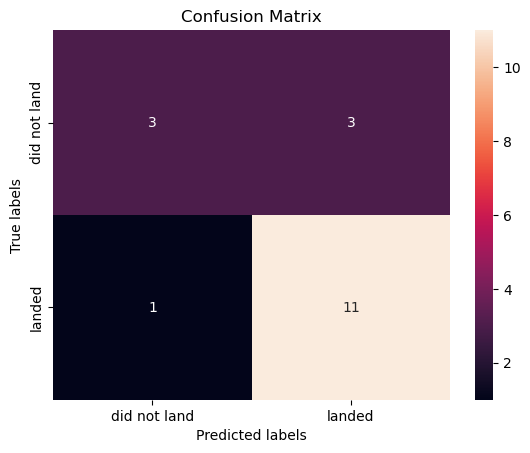

In [63]:
#Predict the test dataset using the KNN model and plot the confusion matrix
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)

<Axes: xlabel='model', ylabel='accuracy'>

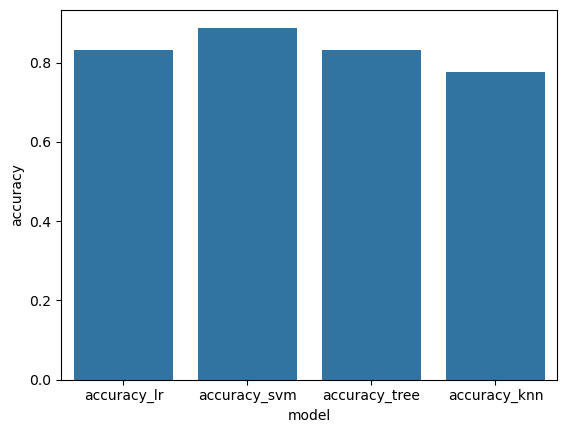

In [65]:
#Accuracy comparison with a bar chart 
accuracy_data = {"model":["accuracy_lr", "accuracy_svm", "accuracy_tree", "accuracy_knn"],
                 "accuracy":[accuracy_lr, accuracy_svm, accuracy_tree, accuracy_knn]}
accuracy_df = pd.DataFrame(accuracy_data)
sns.barplot(accuracy_df, x='model', y='accuracy')

Among the four models, SVM achieved the highest accuracy in predicting SpaceX landing outcomes. It correctly predicted all 4 unsuccessful landings 12 out of 14 successful landings in the test data.